# Library

In [1]:
import pandas as pd
import sys

In [2]:
print("Can you see this?")

Can you see this?


In [3]:
!{sys.executable} -m pip install PyAthena

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached PyAthena-2.5.2-py3-none-any.whl (40 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [4]:
from pyathena import connect

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans,DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import SparsePCA
from scipy import sparse as sp
import scipy

In [7]:
np.random.seed(1)

# Getting Data
* Only getting 2000 records (remove the limit for full set)

In [8]:
conn = connect(s3_staging_dir='s3://athena-results-c7fhgh8/',
               region_name='us-east-1')

df = pd.read_sql("select * from \"millionsongdataset-intermediate\".songdata;", conn)
%store df

Stored 'df' (DataFrame)


In [9]:
df.shape

(1000000, 53)

# EDA

In [10]:
df.dtypes

analysis_sample_rate                int64
audio_md5                          object
danceability                      float64
duration                          float64
end_of_fade_in                    float64
energy                            float64
idx_bars_confidence                 int64
idx_bars_start                      int64
idx_beats_confidence                int64
idx_beats_start                     int64
idx_sections_confidence             int64
idx_sections_start                  int64
idx_segments_confidence             int64
idx_segments_loudness_max           int64
idx_segments_loudness_max_time      int64
idx_segments_loudness_start         int64
idx_segments_pitches                int64
idx_segments_start                  int64
idx_segments_timbre                 int64
idx_tatums_confidence               int64
idx_tatums_start                    int64
key                                 int64
key_confidence                    float64
loudness                          

In [11]:
df.describe()

,analysis_sample_rate,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,...,artist_latitude,artist_longitude,artist_playmeid,idx_artist_terms,idx_similar_artists,release_7digitalid,song_hotttnesss,track_7digitalid,idx_artist_mbtags,year
count,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,...,357492.000000,127271.000000,663845.000000,688551.000000,974860.000000,688808.000000,683101.000000,6.639410e+05,9.747070e+05,9.995510e+05
mean,22050.0,0.0,249.500755,0.819850,0.0,0.0,0.0,0.0,0.0,0.0,...,38.999425,-51.684776,27180.366161,873.333326,1.497736,382594.413299,157820.728287,4.399944e+06,1.228737e+06,9.399613e+04
std,0.0,0.0,126.229636,3.304457,0.0,0.0,0.0,0.0,0.0,0.0,...,15.196324,60.966460,49280.664253,9453.443034,348.971791,243910.981596,234384.121982,2.633287e+06,2.323994e+06,7.204887e+05
min,22050.0,0.0,0.313020,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-53.100000,-155.994000,-118.000000,-3.000000,-1.000000,0.000000,-1.000000,0.000000e+00,-1.000000e+00,0.000000e+00
25%,22050.0,0.0,180.740770,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,34.072150,-93.365860,-1.000000,0.000000,0.000000,174727.000000,0.327737,2.180134e+06,0.000000e+00,0.000000e+00
50%,22050.0,0.0,228.858320,0.194000,0.0,0.0,0.0,0.0,0.0,0.0,...,40.655070,-74.726710,-1.000000,0.000000,0.000000,367198.000000,0.640969,4.309458e+06,0.000000e+00,0.000000e+00
75%,22050.0,0.0,289.932610,0.432000,0.0,0.0,0.0,0.0,0.0,0.0,...,47.603560,-1.207880,38624.000000,0.000000,0.000000,597295.000000,285010.000000,6.691976e+06,1.269624e+06,1.998000e+03
max,22050.0,0.0,3034.905670,1163.941000,0.0,0.0,0.0,0.0,0.0,0.0,...,70.695760,178.690960,242965.000000,213838.000000,88526.000000,823654.000000,823603.000000,9.091277e+06,9.090577e+06,9.090617e+06


In [12]:
df.isna().sum()

analysis_sample_rate                   0
audio_md5                              0
danceability                           0
duration                               0
end_of_fade_in                         0
energy                                 0
idx_bars_confidence                    0
idx_bars_start                         0
idx_beats_confidence                   0
idx_beats_start                        0
idx_sections_confidence                0
idx_sections_start                     0
idx_segments_confidence                0
idx_segments_loudness_max              0
idx_segments_loudness_max_time         0
idx_segments_loudness_start            0
idx_segments_pitches                   0
idx_segments_start                     0
idx_segments_timbre                    0
idx_tatums_confidence                  0
idx_tatums_start                       0
key                                    0
key_confidence                         0
loudness                               0
mode            

In [13]:
(df==0).sum()

analysis_sample_rate                    0
audio_md5                               0
danceability                      1000000
duration                                0
end_of_fade_in                     311267
energy                            1000000
idx_bars_confidence               1000000
idx_bars_start                    1000000
idx_beats_confidence              1000000
idx_beats_start                   1000000
idx_sections_confidence           1000000
idx_sections_start                1000000
idx_segments_confidence           1000000
idx_segments_loudness_max         1000000
idx_segments_loudness_max_time    1000000
idx_segments_loudness_start       1000000
idx_segments_pitches              1000000
idx_segments_start                1000000
idx_segments_timbre               1000000
idx_tatums_confidence             1000000
idx_tatums_start                  1000000
key                                122237
key_confidence                      55849
loudness                          

(array([6.10000e+01, 9.50000e+01, 3.35000e+02, 1.91600e+03, 8.60900e+03,
        3.34440e+04, 1.27530e+05, 3.97419e+05, 4.28018e+05, 2.57300e+03]),
 array([-58.178 , -51.9284, -45.6788, -39.4292, -33.1796, -26.93  ,
        -20.6804, -14.4308,  -8.1812,  -1.9316,   4.318 ]),
 <a list of 10 Patch objects>)

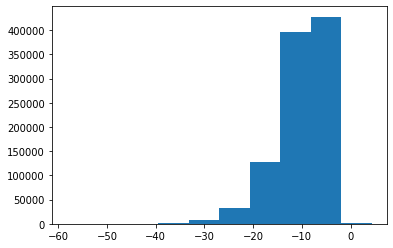

In [14]:
plt.hist(df['loudness'])

(array([3.82500e+03, 1.45470e+04, 1.48353e+05, 3.18692e+05, 3.13132e+05,
        1.37593e+05, 4.91120e+04, 1.32590e+04, 1.46500e+03, 2.20000e+01]),
 array([  0.  ,  30.23,  60.46,  90.69, 120.92, 151.15, 181.38, 211.61,
        241.84, 272.07, 302.3 ]),
 <a list of 10 Patch objects>)

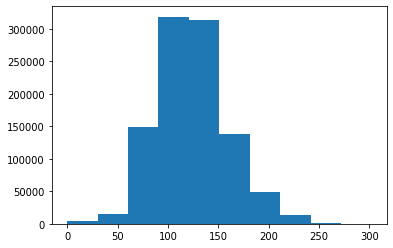

In [15]:
plt.hist(df['tempo'])

(array([979937.,   2224.,   2304.,   3478.,   2235.,   2009.,   2206.,
          1882.,   1509.,   1767.]),
 array([      0. ,  909061.7, 1818123.4, 2727185.1, 3636246.8, 4545308.5,
        5454370.2, 6363431.9, 7272493.6, 8181555.3, 9090617. ]),
 <a list of 10 Patch objects>)

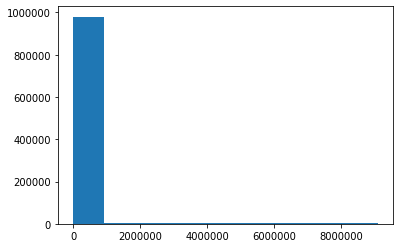

In [16]:
plt.hist(df['year'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd720d1e9d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd720d1e790>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd720d29e10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd720d34dd0>}

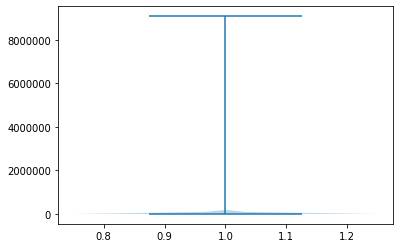

In [17]:
plt.violinplot(df[~df.year.isna()]['year'])

(array([ 10426.,   5246.,  14937.,  70230., 215473., 317989., 225816.,
         99311.,  37344.,   3043.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

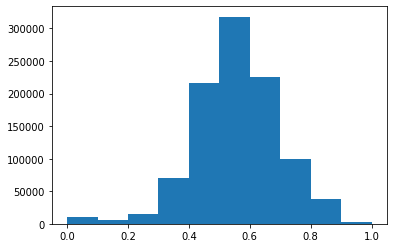

In [18]:
plt.hist(df['artist_familiarity'])

# Preprocessing

## Create Clean Frame
* Filter 0 year and years that are > 2022. ==> Note that this SIGNIFICANTLY reduces # of records we can work with so may choose not to do it.
* Select a subset of columns

In [ ]:
# filtered_df = df[(df['year']>0)&(df['year']<=2022)][['loudness','tempo','artist_hotttness'
#                                                      ,'artist_familiarity','genre','song_hotttness'
#                                                      ,'track_id','song_id','artist_id'
#                                                      ,'artist_name','title']].copy()
filtered_df_1 = df[[
    'loudness',
    'tempo',
    'artist_hotttnesss',
    'artist_familiarity',
    'genre',
    'song_hotttnesss',
    'track_id',
    'song_id',
    'artist_id',
    'artist_name',
    'title'
]].copy()

## Pipeline for Feature Selection

In [20]:
scaler_step = Pipeline([
    ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
    ("scaler", StandardScaler())
])

encoder_step = Pipeline([
    ("encoder", OneHotEncoder())
])

In [21]:
transformers = ColumnTransformer([
    ("scaler_process", scaler_step, ['loudness', 
                                     'tempo', 
                                     'artist_hotttnesss', 
                                     'song_hotttnesss',
                                     'artist_familiarity'
                                    ])
    ,
    ("encoder_process", encoder_step, ['genre'])
])

In [22]:
feature_pipeline = Pipeline([
    ("processor", transformers),
    ("kmeans_modeller", KMeans(random_state=1))
])

### Split the data

In [23]:
train_indices = np.random.choice(filtered_df_1.index, size=int(filtered_df_1.shape[0]*0.8), replace=False)

In [24]:
test_df_1 = filtered_df_1[~filtered_df_1.index.isin(train_indices)]
train_df_1 = filtered_df_1[filtered_df_1.index.isin(train_indices)]

In [ ]:
%store -r df

### Feed the train set to feature pipeline

In [ ]:
feature_pipeline.fit(train_df_1)

### Extract model

In [ ]:
feat_selection_kmeans = feature_pipeline['kmeans_modeller']
feat_selection_dbscan = feature_pipeline['dbscan_modeller']

### Extract transformed dataframe

In [ ]:
transformed_train_df_1 = feature_pipeline['processor'].fit_transform(train_df_1)

### Scoring the clustering methods

#### Kmeans

In [ ]:
silhouette_score(transformed_train_df_1, feat_selection_kmeans.labels_, metric='euclidean',sample_size=int(train_df_1.shape[0]*0.3))

In [ ]:
calinski_harabasz_score(transformed_train_df_1.toarray(), feat_selection_kmeans.labels_)

In [ ]:
kmeans_classes = np.unique(feat_selection_kmeans.labels_)

In [ ]:
feat_selection_kmeans.cluster_centers_